In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def poly(x):
    return 1/(1+x**2)

In [138]:
# xp = np.array([0,1,2,3,4,5])
# yp = poly(xp)

In [7]:
def comb(n,r):
    prod = 1;
    prod2=1;
    for i in range(r):
        prod = prod*(n-i)
        prod2 = prod2*(i+1)
    return prod/prod2;

In [8]:
def interpol_fwd(x,xp,yp):
    if (x<=5).all() and (x>=0).all():
        p = x/1;
        pn = yp[0];
        for i in range(1,len(yp)):
            term = 0;
            for j in range(0,i+1):
                term = term + comb(i,j)*(-1)**(i-j)*(yp[j])
            pn = pn + comb(p,i)*(term)
        return pn
    else:
        return 0;

In [9]:
def interpol_bwd(x,xp,yp):
    if (x<=5).all() and (x>=0).all():
        p = (x-5)/1;
        pn = yp[-1];
        for i in range(1,len(yp)):
            term = 0;
            for j in range(0,i+1):
                term = term + comb(i,j)*(-1)**(j)*(yp[len(yp)-1-j])
            pn = pn + comb(p+i-1,i)*(term)
        return pn
    else:
        return 0;

In [20]:
def interpol_fwd(x,xp,yp):
    if (x<=5).all() and (x>=-5).all():
        pn = np.zeros((len(x),))
        for i in range(0,len(yp)-1):
            term=yp[i]
            term2=1;
            for j in range(0,len(yp)-1):
                if j!=i:
                    term = term*(x-xp[j])
                    term2 = term2*(xp[i]-xp[j])
            pn = pn + term/term2
        return pn
    else:
        return 0;

Num : 1, array : [-5.]
Num : 2, array : [-5.  5.]
Num : 3, array : [-5.  0.  5.]
Num : 4, array : [-5.   -1.67  1.67  5.  ]
Num : 5, array : [-5.  -2.5  0.   2.5  5. ]
Num : 6, array : [-5. -3. -1.  1.  3.  5.]
Num : 7, array : [-5.   -3.33 -1.67  0.    1.67  3.33  5.  ]
Num : 8, array : [-5.   -3.57 -2.14 -0.71  0.71  2.14  3.57  5.  ]
Num : 9, array : [-5.   -3.75 -2.5  -1.25  0.    1.25  2.5   3.75  5.  ]
Num : 10, array : [-5.   -3.89 -2.78 -1.67 -0.56  0.56  1.67  2.78  3.89  5.  ]
Num : 11, array : [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
Num : 12, array : [-5.   -4.09 -3.18 -2.27 -1.36 -0.45  0.45  1.36  2.27  3.18  4.09  5.  ]
Num : 13, array : [-5.   -4.17 -3.33 -2.5  -1.67 -0.83  0.    0.83  1.67  2.5   3.33  4.17
  5.  ]
Num : 14, array : [-5.   -4.23 -3.46 -2.69 -1.92 -1.15 -0.38  0.38  1.15  1.92  2.69  3.46
  4.23  5.  ]
Num : 15, array : [-5.   -4.29 -3.57 -2.86 -2.14 -1.43 -0.71  0.    0.71  1.43  2.14  2.86
  3.57  4.29  5.  ]
Num : 16, array : [-5.   -4.33 -3.67 

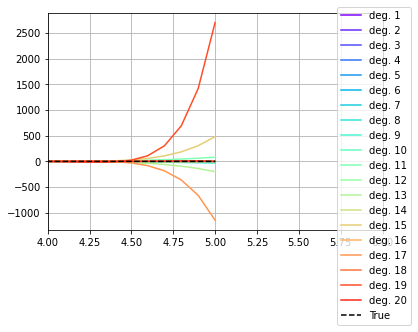

In [44]:
xtest = np.linspace(-5,5,100)
ytest = poly(xtest)
maxnum = 20
colors = cm.rainbow(np.linspace(0, 1, maxnum+1))
plt.figure()
for i in range(1,maxnum+1):
    xp = np.linspace(-5,5,i)
    print("Num : " + str(i) + ", array : " + str(np.round(xp,2)))
    yp = poly(xp)
    yint_fwd = np.array(interpol_fwd(xtest,xp,yp)).reshape(len(xtest),)
#     print(xtest.shape)
#     print(yint_fwd.shape)
#     yint_bwd = interpol_bwd(xtest,xp,yp)
    plt.plot(xtest,yint_fwd,color=colors[i-1],label="deg. " + str(i))
#     plt.plot(xtest,yint_bwd-ytest,'--r')
# plt.plot(xtest,ytest,'-k')
plt.plot(xtest,ytest,'--k', label="True")
plt.legend(bbox_to_anchor=(1.1, 1.05))
# plt.ylim([-5,5])
plt.xlim([4,6])
plt.grid()
plt.show()
# yint_fwdgiven = interpol_fwd(xp)
# yint_bwdgiven = interpol_bwd(xp)